In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

<h2><b>Understanding the features of the data</b></h2>

In [8]:
products = pd.read_csv('skincare_df.csv')
products.columns

Index(['Unnamed: 0', 'brand', 'name', 'price', 'n_of_reviews', 'n_of_loves',
       'review_score', 'size', 'reviews_to_loves_ratio', 'return_on_reviews',
       'price_per_ounce'],
      dtype='object')

<h3><b>Dropping unnamed column</b></h3>

In [9]:
#Data Cleaning 
products = products.drop(columns=['Unnamed: 0']).drop_duplicates()
products = products.dropna()
null_count = products.isnull().sum() #no null columns found in the data set

,brand,name,price,n_of_reviews,n_of_loves,review_score,size,reviews_to_loves_ratio,return_on_reviews,price_per_ounce
0,Drunk Elephant,Protini Polypeptide Moisturizer,68.0,1000,136008,4.2097,1.69,0.74,0.42,40.24
1,La Mer,Crreme de la Mer,175.0,493,61648,4.0974,1.00,0.80,0.83,175.00
2,IT Cosmetics,CC+ Cream with SPF 50+,39.0,2000,188389,4.0403,1.08,1.06,0.20,36.11
3,Tatcha,The Water Cream,68.0,1000,149323,4.2447,1.70,0.67,0.42,40.00
5,Drunk Elephant,Lala Retro Whipped Moisturizer,60.0,1000,103949,4.2228,1.69,0.96,0.42,35.50
...,...,...,...,...,...,...,...,...,...,...
1684,Origins,Dr. Weil For Origins‚Ñ¢ Mega-Mushroom Skin Rel...,50.0,11,2261,4.0000,0.50,0.49,36.36,100.00
1685,Klorane,BB Eye Cream with Soothing Cornflower,26.0,21,1625,3.2381,0.50,1.29,15.42,52.00
1686,Guerlain,Abeille Royale Gold Eyetech Eye Sculpt Serum,130.0,13,2659,4.0769,0.50,0.49,31.36,260.00
1687,KENZOKI,Lotus Caress to Moisturize Eyes,35.0,8,606,3.5000,0.50,1.32,43.75,70.00


<h3><b>Running statistical analysis on data</b></h3>

In [4]:
#statistical data analysis
print("Data Statistics")
products.describe()

Data Statistics


,price,n_of_reviews,n_of_loves,review_score,size,reviews_to_loves_ratio,return_on_reviews,price_per_ounce
count,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000
mean,64.375622,240.741294,13296.990050,4.181716,1.924619,2.455814,31.121095,59.013085
std,48.367162,494.085298,23822.329185,0.438251,2.117619,5.805008,76.625439,60.154003
min,4.000000,1.000000,104.000000,1.000000,0.080000,0.070000,0.060000,1.500000
25%,38.000000,17.000000,1983.500000,3.953450,1.000000,0.660000,1.610000,22.940000
50%,50.000000,72.000000,4810.000000,4.215400,1.600000,1.200000,5.730000,40.380000
75%,75.000000,261.000000,13050.000000,4.443500,1.700000,2.180000,24.145000,76.680000
max,495.000000,7000.000000,235409.000000,5.000000,32.000000,96.360000,500.000000,520.000000


In [5]:
print("Data Shape")
products.shape

Data Shape


(1407, 10)

In [6]:
products.head()

,brand,name,price,n_of_reviews,n_of_loves,review_score,size,reviews_to_loves_ratio,return_on_reviews,price_per_ounce
0,Drunk Elephant,Protini Polypeptide Moisturizer,68.0,1000,136008,4.2097,1.69,0.74,0.42,40.24
1,La Mer,Crreme de la Mer,175.0,493,61648,4.0974,1.00,0.80,0.83,175.00
2,IT Cosmetics,CC+ Cream with SPF 50+,39.0,2000,188389,4.0403,1.08,1.06,0.20,36.11
3,Tatcha,The Water Cream,68.0,1000,149323,4.2447,1.70,0.67,0.42,40.00
5,Drunk Elephant,Lala Retro Whipped Moisturizer,60.0,1000,103949,4.2228,1.69,0.96,0.42,35.50


<h3><b>One Hot Encoding on data</b></h3>

In [7]:
#Data Transformation
enc = OneHotEncoder(handle_unknown = 'ignore')
encoded = enc.fit_transform(products[['name']])
names = enc.get_feature_names_out()
enc_df = pd.DataFrame(encoded.toarray(),columns=names)
enc_df

,name_ Geranium & Orange Blossom Luxury Face Oil,name_ Lavender Absolute Luxury Face Oil,"name_""B"" Oil","name_""Buffet""","name_""Buffet"" + Copper Peptides 1%",name_+Retinol Vita C Power Serum,name_10% Glycolic Solutions Moisturizer,name_100 percent Pure Argan Oil,name_100 percent Pure Argan Oil Light,name_100% Organic Cold-Pressed Rose Hip Seed Oil,...,name_anti-wrinkle miracle worker night+ line-correcting overnight cream,name_anti-wrinkle miracle worker+ line-correcting moisturizer,name_needles no more¬Æ NO MORE BAGGAGE‚Ñ¢ eye de-puffing gel,name_needles no more¬Æ Neck Sculpting Cream,name_needles no more‚Ñ¢,name_pores no more¬Æ Mattifying Hydrator Pore Minimizing Gel,name_pores no more¬Æ multi-performance stick,name_√ânergie de Vie The Illuminating & Anti-Fatigue Cooling Eye Gel,name_√ânergie de Vie The Overnight Recovery Sleeping Mask,name_√ânergie de Vie The Smoothing & Plumping Water-Infused Cream
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#joining the encoded columns
products = products.join(enc_df)
products.head(5)

,brand,name,price,n_of_reviews,n_of_loves,review_score,size,reviews_to_loves_ratio,return_on_reviews,price_per_ounce,...,name_anti-wrinkle miracle worker night+ line-correcting overnight cream,name_anti-wrinkle miracle worker+ line-correcting moisturizer,name_needles no more¬Æ NO MORE BAGGAGE‚Ñ¢ eye de-puffing gel,name_needles no more¬Æ Neck Sculpting Cream,name_needles no more‚Ñ¢,name_pores no more¬Æ Mattifying Hydrator Pore Minimizing Gel,name_pores no more¬Æ multi-performance stick,name_√ânergie de Vie The Illuminating & Anti-Fatigue Cooling Eye Gel,name_√ânergie de Vie The Overnight Recovery Sleeping Mask,name_√ânergie de Vie The Smoothing & Plumping Water-Infused Cream
0,Drunk Elephant,Protini Polypeptide Moisturizer,68.0,1000,136008,4.2097,1.69,0.74,0.42,40.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,La Mer,Crreme de la Mer,175.0,493,61648,4.0974,1.00,0.80,0.83,175.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,IT Cosmetics,CC+ Cream with SPF 50+,39.0,2000,188389,4.0403,1.08,1.06,0.20,36.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Tatcha,The Water Cream,68.0,1000,149323,4.2447,1.70,0.67,0.42,40.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Drunk Elephant,Lala Retro Whipped Moisturizer,60.0,1000,103949,4.2228,1.69,0.96,0.42,35.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h2><b>Data Visualization</b></h2>

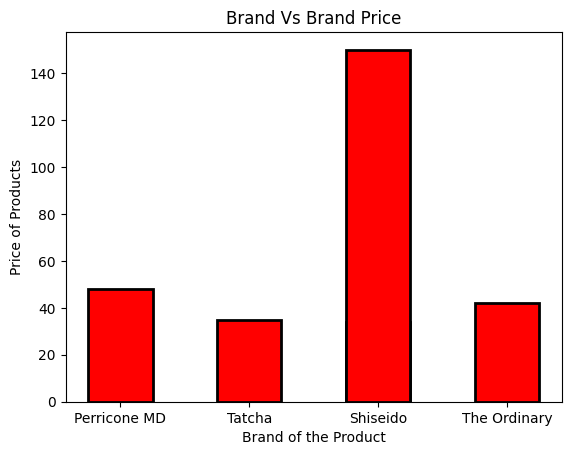

In [9]:
#Visualizing the Data
x = products['brand'].sample(n=5)
y = products['price'].sample(n=5)
plt.bar(x,y,color='red',width=0.5,edgecolor='black', linewidth=2)
plt.xlabel('Brand of the Product')
plt.ylabel('Price of Products')
plt.title('Brand Vs Brand Price')
plt.show()

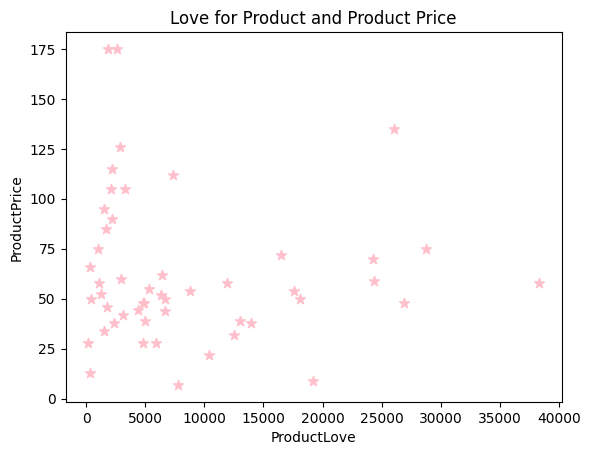

In [10]:
x = products['n_of_loves'].sample(n=50)
y = products['price'].sample(n=50)
plt.scatter(x,y,s = 55, c='pink',marker='*')
plt.xlabel('ProductLove')
plt.ylabel('ProductPrice')
plt.title('Love for Product and Product Price')
plt.show()

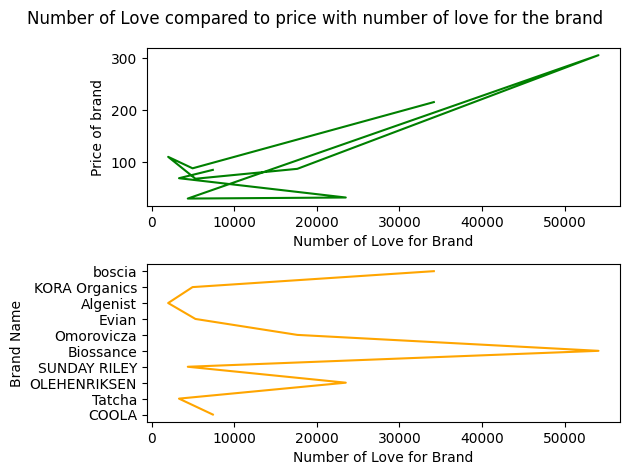

In [11]:
#Exploratory Data Analysis
fig, axs = plt.subplots(2)
x = products['n_of_loves'].sample(n=10)
axs[0].plot(x,products['price'].sample(n=10),color='green')
axs[1].plot(x,products['brand'].sample(n=10),color='orange')
axs[0].set_xlabel('Number of Love for Brand')
axs[1].set_xlabel('Number of Love for Brand')
axs[0].set_ylabel('Price of brand')
axs[1].set_ylabel('Brand Name')
fig.suptitle('Number of Love compared to price with number of love for the brand')
plt.tight_layout()
plt.show()

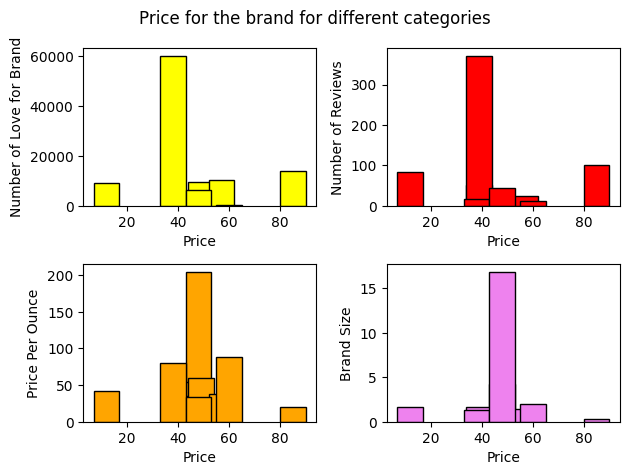

In [12]:
fig, axs = plt.subplots(2,2)
x = products['price'].sample(n=10)
axs[0,0].bar(x,products['n_of_loves'].sample(n=10),width=10,color='yellow',edgecolor='black')
axs[0,1].bar(x,products['n_of_reviews'].sample(n=10),width=10,color='red',edgecolor='black')
axs[1,0].bar(x,products['price_per_ounce'].sample(n=10),width=10,color='orange',edgecolor='black')
axs[1,1].bar(x,products['size'].sample(n=10),width=10,color='violet',edgecolor='black')
fig.suptitle('Price for the brand for different categories')
axs[0,0].set_xlabel('Price')
axs[0,0].set_ylabel('Number of Love for Brand')

axs[0,1].set_xlabel('Price')
axs[0,1].set_ylabel('Number of Reviews')

axs[1,0].set_xlabel('Price')
axs[1,0].set_ylabel('Price Per Ounce')

axs[1,1].set_xlabel('Price')
axs[1,1].set_ylabel('Brand Size')

plt.tight_layout()
plt.show()

<h2><b>Data Interpretation</b></h2>
<h3>Top products based on Public review and love for the brand.</h3>
<h4>This gives the list of top five product brands which is based on Public review and their love for that brand simultaneously for.</h4> 

In [13]:
#Data Interpretation
print('Top Products based on Public Review and Love for the Brand')
brands = products.groupby('brand').sum().reset_index()[['brand', 'n_of_reviews','n_of_loves']]
purchased=brands.sort_values(by=['n_of_reviews'], ascending=False)[:10]
desired=brands.sort_values(by=['n_of_loves'], ascending=False)[:10]
both = pd.merge(purchased, desired[['brand']], how='inner', on=['brand'])
both.set_index('brand')

Top Products based on Public Review and Love for the Brand


C:\Users\Admin\AppData\Local\Temp\ipykernel_7456\588099028.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  brands = products.groupby('brand').sum().reset_index()[['brand', 'n_of_reviews','n_of_loves']]


,n_of_reviews,n_of_loves
brand,,
CLINIQUE,19740,825127
OLEHENRIKSEN,14663,569160
First Aid Beauty,13854,577345
GLAMGLOW,12164,713946
tarte,12084,574987


<h3>Top 10 Products based on public review</h3>
<h4>Below list gives top 10 products along with its Brand and product name, price and review score out of 5</h4>

In [14]:
print('Top 10 Must have Products based on public Review')
products['reviews_to_loves'] = (products['n_of_reviews']/products['n_of_loves'])*100
must_have=products[['brand', 'name','price','reviews_to_loves','review_score']].sort_values(by='reviews_to_loves', ascending=False)[:10]
must_have

Top 10 Must have Products based on public Review


,brand,name,price,reviews_to_loves,review_score
631,Lanc√¥me,Visionnaire Skin Solutions Pure 0.2% Retinol C...,75.0,96.363636,4.4292
1253,Lancer,Corrective Lightening Treatment,125.0,91.133005,4.1892
1149,Perricone MD,High Potency Classics: Firming Evening Repair,99.0,67.251462,4.4174
206,Peter Thomas Roth,Peptide 21‚ Lift & Firm Moisturizer,78.0,47.619048,4.6486
711,Proactiv,Daily Oil Control Moisturizer SPF 30,24.0,47.564470,4.1265
720,Perricone MD,Essential Fx Acyl-Glutathione Intensive Overni...,179.0,45.486111,4.3282
349,Dermalogica,Skin Smoothing Cream Moisturizer,69.0,43.225806,4.4627
549,Dermalogica,Intensive Moisture Balance Moisturizer,50.0,40.086207,4.5806
98,Lanc√¥me,UV Expert Aquagel Defense Primer & Moisturizer...,39.0,33.449477,4.5208
418,Dermalogica,Sound Sleep Cocoon Night Gel-Cream,80.0,33.333333,4.5429


<h3>Product list based on lowest Price Values</h3>

In [15]:
print('Product list based on lowest price value')
best_value = products.sort_values('price_per_ounce')[:10]
best_value

Product list based on lowest price value


,brand,name,price,n_of_reviews,n_of_loves,review_score,size,reviews_to_loves_ratio,return_on_reviews,price_per_ounce,...,name_anti-wrinkle miracle worker+ line-correcting moisturizer,name_needles no more¬Æ NO MORE BAGGAGE‚Ñ¢ eye de-puffing gel,name_needles no more¬Æ Neck Sculpting Cream,name_needles no more‚Ñ¢,name_pores no more¬Æ Mattifying Hydrator Pore Minimizing Gel,name_pores no more¬Æ multi-performance stick,name_√ânergie de Vie The Illuminating & Anti-Fatigue Cooling Eye Gel,name_√ânergie de Vie The Overnight Recovery Sleeping Mask,name_√ânergie de Vie The Smoothing & Plumping Water-Infused Cream,reviews_to_loves
286,Mario Badescu,"Facial Spray with Aloe, Cucumber and Green Tea",12.0,44,7977,4.1364,8.0,0.55,9.40,1.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.551586
132,Mario Badescu,"Facial Spray with Aloe, Herbs and Rosewater",12.0,111,17595,4.2432,8.0,0.63,3.82,1.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.630861
295,Mario Badescu,"Facial Spray with Aloe, Chamomile and Lavender",12.0,25,6470,4.5200,8.0,0.39,18.08,1.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.386399
1422,Four Sigmatic,Mushroom Coffee Mix with Lion's Mane & Chaga,15.0,65,2052,4.8769,9.0,3.17,7.50,1.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.167641
585,Evian,Evian x Chiara Ferragni Limited Edition Brumis...,18.0,8,2601,5.0000,10.1,0.31,62.50,1.78,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.307574
1462,bkr,Spiked Lala Glass Water Bottle,58.0,14,1655,4.5714,32.0,0.85,32.65,1.81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.845921
1396,Moon Juice,Full Moon Dust¬Æ Box,35.0,70,8180,3.8429,15.6,0.86,5.49,2.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.855746
1426,Herbivore,Detox Soaking Salts,18.0,6,3017,3.1667,8.0,0.20,52.78,2.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.198873
1372,Herbivore,Coconut Milk Bath Soak,18.0,33,6629,4.0606,8.0,0.50,12.30,2.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.497813
1336,Vital Proteins,Collagen Peptides,25.0,63,6333,4.2222,10.0,0.99,6.70,2.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.994789
